# TP3, NLP

## PARTIE I

In [13]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

In [14]:
# %load visualization.py
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
nltk.download('stopwords')

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Khadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# matplotlib inline
data = pd.read_csv(r'C:\Users\Khadi\OneDrive\Documents\ESILV\A5\NLP\TP3_NLP\train.csv').sample(50000, random_state=23)
STOP_WORDS = nltk.corpus.stopwords.words()

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOP_WORDS = set(stopwords.words('english'))  # Utilisez la langue appropriée

def clean_sentence(val):
    """
    Remove characters that are not letters or numbers, downcase, then remove stop words.
    Args:
        val (str): The sentence to clean.
    
    Returns:
        str: The cleaned sentence.
    """
    # Précompiler le regex pourrait améliorer les performances
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()  # Enlever les caractères non alphanumériques et mettre en minuscules
    words = sentence.split(" ")  # Diviser en mots
    filtered_words = [word for word in words if word not in STOP_WORDS]  # Filtrer les stop words
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Khadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Exemple d'utilisation
cleaned_sentence = clean_sentence("This is an example! Let's see how it works.")
print(cleaned_sentence)  # Sortie attendue : "example lets see works"

example lets see works


In [18]:
def clean_dataframe(data):
    """
    Drop rows with NaNs and apply 'clean_sentence' function to 'question1' and 'question2'.
    Args:
        data (DataFrame): The pandas DataFrame to clean.
    
    Returns:
        DataFrame: The cleaned DataFrame.
    """
    # Supprimer les lignes avec des valeurs NaN
    data_cleaned = data.dropna(how="any")
    
    # Nettoyer les colonnes 'question1' et 'question2' en utilisant la fonction 'clean_sentence'
    for col in ['question1', 'question2']:
        data_cleaned[col] = data_cleaned[col].apply(clean_sentence)
    
    return data_cleaned

# Appliquer la fonction à votre DataFrame et afficher les premières lignes
data_cleaned = clean_dataframe(data)
data_cleaned.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex necessary relationship,sex important good relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories ever,0
294691,294691,150129,93109,best way digital marketing,best unique ways digital marketing,1
104145,104145,171986,171987,best way grow facebook fan page,get followers facebook page,1
357893,357893,487310,487311,suppose host sends two tcp segments back back ...,suppose host sends two tcp segments back back ...,1


In [19]:
def build_corpus(data):
    """
    Creates a list of lists containing words from each sentence in 'question1' and 'question2' columns.
    Args:
        data (DataFrame): The pandas DataFrame with text data in 'question1' and 'question2' columns.
    
    Returns:
        list: The corpus as a list of lists of words.
    """
    corpus = []
    for col in ['question1', 'question2']:
        # Utiliser extend pour ajouter des éléments à la liste corpus
        # List comprehension est utilisée pour créer la liste de mots pour chaque phrase
        corpus.extend(data[col].dropna().apply(lambda x: x.split(" ")).tolist())
    
    return corpus

# Appliquer la fonction à votre DataFrame et afficher les premières lignes
corpus = build_corpus(data_cleaned)  # Assurez-vous que 'data_cleaned' est votre DataFrame nettoyé
corpus[:5]  # Afficher les 5 premières listes de mots dans le corpus

[['sex', 'necessary', 'relationship'],
 ['inspiring', 'start', 'stories'],
 ['best', 'way', 'digital', 'marketing'],
 ['best', 'way', 'grow', 'facebook', 'fan', 'page'],
 ['suppose',
  'host',
  'sends',
  'two',
  'tcp',
  'segments',
  'back',
  'back',
  'host',
  'b',
  'tcp',
  'connection',
  'first',
  'segment',
  'sequence',
  'number',
  '140',
  'second',
  'sequence',
  'number',
  '170']]

In [20]:
# Construire le corpus à partir des données nettoyées
corpus = build_corpus(data_cleaned)
print(corpus[:2])  # Affiche les 2 premières listes de mots du corpus pour vérification

# Paramètres pour le modèle Word2Vec
vector_size = 100  # Taille des vecteurs de mots
window = 20        # Fenêtre contextuelle maximale
min_count = 200    # Ignorer les mots dont la fréquence totale est inférieure à ceci
workers = 4        # Nombre de threads à utiliser pour l'entraînement

# Initialiser et entraîner le modèle Word2Vec
model = Word2Vec(sentences=corpus, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

# Obtenir le vecteur de mots pour un mot spécifique (exemple 'trump')
word_vector = model.wv['trump']  # Vous pouvez remplacer 'trump' par n'importe quel mot de votre corpus
print(word_vector)

[['sex', 'necessary', 'relationship'], ['inspiring', 'start', 'stories']]
[ 0.23628397  0.7145786  -1.1000006   0.2722315   0.01006528 -1.3416206
  0.304104    1.938878   -1.4951735  -0.56405544 -0.7086733   0.1773198
 -0.5315013   1.5929168   0.8540589   0.6481553  -0.4264012  -0.26517335
  0.3428767  -0.26073232 -0.27501187  0.12954466 -0.08628629  0.6666979
  0.17952085  0.04229358  0.8481483  -1.0054256  -0.6370906   0.6677813
  1.2773788  -0.3357173  -0.00497324 -0.64119995  0.34290707  1.4548873
 -0.15621845  0.75971115  0.11547759 -0.8200198  -0.94241935 -0.18950115
 -0.76295114  0.41746575  0.6285644   0.66110545 -0.49483484  0.31592673
 -1.6283395  -0.1264319   0.15066408  0.34098914 -0.20416583 -0.06118254
 -0.25688636  0.4805913  -0.57348126 -0.7384197  -0.6646432  -0.65617436
  0.08472665 -0.4127379  -0.50922656  0.095024   -0.43440354  0.24497822
  0.3454893  -0.11029708  0.28400543  0.00674087  0.42129874  0.16674812
 -0.12696886 -0.17208865  1.5263038  -0.31387702 -0.034

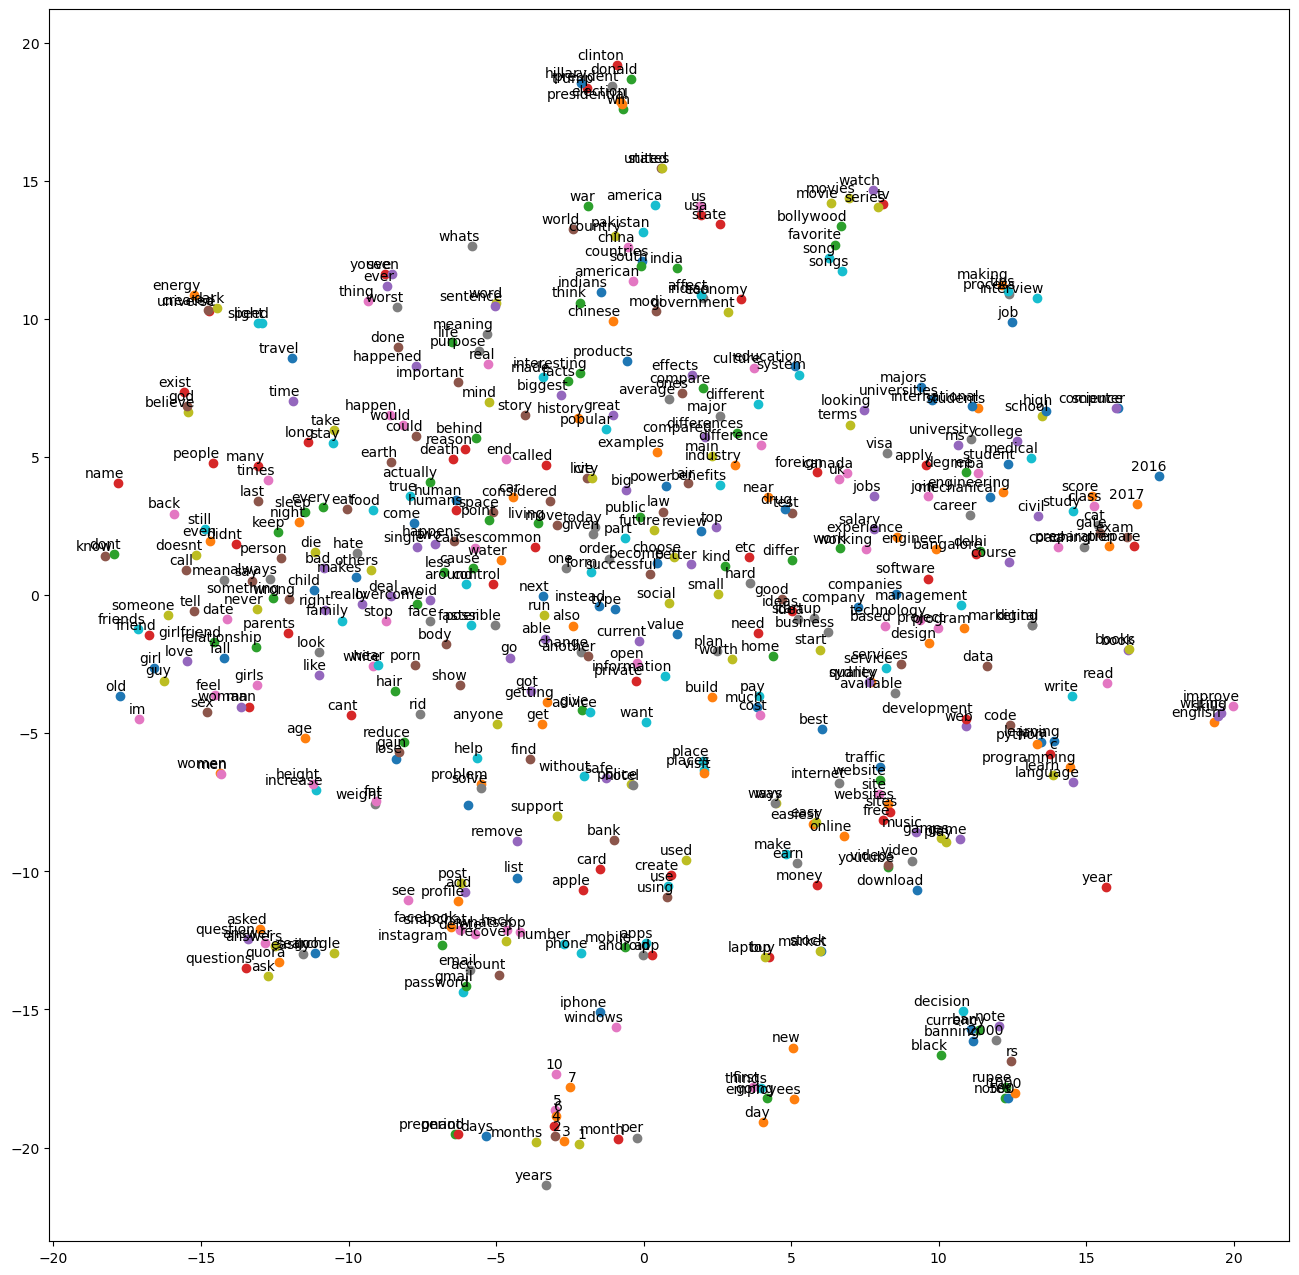

In [21]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def tsne_plot(model):
    """
    Creates and plots a TSNE model based on the provided Word2Vec model.
    Args:
        model: The Word2Vec model.
    """
    # Récupérer la liste des mots du vocabulaire
    labels = [word for word in model.wv.index_to_key]
    
    # Récupérer les vecteurs de mots correspondants
    tokens = [model.wv[word] for word in labels]
    
    # S'assurer que tokens est un array NumPy
    tokens = np.array(tokens)
    
    # Créer et entraîner le modèle TSNE
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    # Séparer les dimensions x et y
    x, y = new_values[:, 0], new_values[:, 1]
    
    # Créer un graphique pour la visualisation
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Appeler la fonction tsne_plot
tsne_plot(model)